In [8]:
import requests
from datetime import datetime, date, timedelta
start_date = date(2020, 10, 13)
end_date = date(2020, 10, 18)
delta = timedelta(days=1)
while start_date <= end_date:  
    day = start_date.strftime("%Y-%m-%d")  
    print("Downloading " + day)    
    url = "https://api.covid19tracking.narrativa.com/api/" + day
    r = requests.get(url)
    data = r.json()    
    start_date += delta


In [11]:
print(data)


{'dates': {'2020-10-18': {'countries': {'Afghanistan': {'date': '2020-10-18', 'id': 'afghanistan', 'links': [{'href': '/api/2020-10-18/country/afghanistan', 'rel': 'self', 'type': 'GET'}], 'name': 'Afghanistan', 'name_es': 'Afganistán', 'name_it': 'afghanistan', 'regions': [], 'source': 'John Hopkins University', 'today_confirmed': 40200, 'today_deaths': 1492, 'today_new_confirmed': 59, 'today_new_deaths': 4, 'today_new_open_cases': 2, 'today_new_recovered': 53, 'today_open_cases': 5094, 'today_recovered': 33614, 'today_vs_yesterday_confirmed': 0.0014698188884183505, 'today_vs_yesterday_deaths': 0.0026881720430107503, 'today_vs_yesterday_open_cases': 0.0003927729772190691, 'today_vs_yesterday_recovered': 0.0015792139685943951, 'yesterday_confirmed': 40141, 'yesterday_deaths': 1488, 'yesterday_open_cases': 5092, 'yesterday_recovered': 33561}, 'Albania': {'date': '2020-10-18', 'id': 'albania', 'links': [{'href': '/api/2020-10-18/country/albania', 'rel': 'self', 'type': 'GET'}], 'name': '

In [16]:
!pip install countryinfo



     |████████████████████████████████| 602 kB 2.2 MB/s eta 0:00:01


In [10]:
import pandas as pd
data_df = pd.read_json('https://api.covid19tracking.narrativa.com/api/2021-10-21',orient='records')

In [11]:
data_df

dates  \
2021-10-21                     {'countries': {'Afghanistan': {'date': '2021-1...   
by                                                                           NaN   
url                                                                          NaN   
date                                                                         NaN   
name                                                                         NaN   
name_es                                                                      NaN   
name_it                                                                      NaN   
rid                                                                          NaN   
source                                                                       NaN   
today_confirmed                                                              NaN   
today_deaths                                                                 NaN   
today_new_confirmed                                                          NaN   
today_new_deaths                                                             NaN   
today_new_open_cases                                                         NaN   
today_new_recovered                                                          NaN   
today_open_cases                                                             NaN   
today_recovered                                                              NaN   
today_vs_yesterday_confirmed                                                 NaN   
today_vs_yesterday_deaths                                                    NaN   
today_vs_yesterday_open_cases                                                NaN   
today_vs_yesterday_recovered                                                 NaN   
yesterday_confirmed                                                          NaN   
yesterday_deaths                                                             NaN   
yesterday_open_cases                                                         NaN   
yesterday_recovered                                                          NaN   

                                                              metadata  \
2021-10-21                                                         NaN   
by                                               Narrativa & AppliedXL   
url                            [wwww.narrativa.com, www.appliedxl.com]   
date                                                               NaN   
name                                                               NaN   
name_es                                                            NaN   
name_it                                                            NaN   
rid                                                                NaN   
source                                                             NaN   
today_confirmed                                                    NaN   
today_deaths                                                       NaN   
today_new_confirmed                                                NaN   
today_new_deaths                                                   NaN   
today_new_open_cases                                               NaN   
today_new_recovered                                                NaN   
today_open_cases                                                   NaN   
today_recovered                                                    NaN   
today_vs_yesterday_confirmed                                       NaN   
today_vs_yesterday_deaths                                          NaN   
today_vs_yesterday_open_cases                                      NaN   
today_vs_yesterday_recovered                                       NaN   
yesterday_confirmed                                                NaN   
yesterday_deaths                                                   NaN   
yesterday_open_cases                                               NaN   
yesterday_recovered                     

In [37]:
def save_elasticsearch_es(index, result_data):
    es = Elasticsearch(hosts="elasticsearch:9200") #Your auth data

    es.indices.create(
        index=index,
        ignore=400  # ignore 400 already exists code
    )

    id_case = str(result_data['timestamp'].strftime("%d-%m-%Y")) + \
        '-'+result_data['name']
    es.update(index=index, id=id_case, body={'doc':result_data,'doc_as_upsert':True})

In [43]:
from countryinfo import CountryInfo
for day in data['dates']:
    for country in data['dates'][day]['countries']:
        try:
            country_info = CountryInfo(country)
            country_iso_3 = country_info.iso(3)
            population = country_info.population()
        except Exception as e:
            print("Error with " + country)
            country_iso_3 = country
            population = None
            infection_rate=0
            print(e)
            
        if population != None:
            try:
                infection_rate=getInfectionRate(data['dates'][day]['countries'][country]['today_confirmed'], population)
            except:
                infection_rate=0
                
        result_data = data['dates'][day]['countries'][country]
#        del result_data['regions']
#        result_data['timestamp'] = result_data.pop('date')
        result_data.update(
                     timestamp=datetime.strptime(day, "%Y-%m-%d"),
                     country_iso_3=country_iso_3,
                     population=population,
                     infection_rate=infection_rate,
                     )

        save_elasticsearch_es('covid-19-live-global',result_data)


ConnectionError: ConnectionError(<urllib3.connection.HTTPConnection object at 0x7f104cfd5f70>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution) caused by: NewConnectionError(<urllib3.connection.HTTPConnection object at 0x7f104cfd5f70>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution)

In [30]:
print(result_data)

{'id': 'afghanistan', 'links': [{'href': '/api/2020-10-18/country/afghanistan', 'rel': 'self', 'type': 'GET'}], 'name': 'Afghanistan', 'name_es': 'Afganistán', 'name_it': 'afghanistan', 'source': 'John Hopkins University', 'today_confirmed': 40200, 'today_deaths': 1492, 'today_new_confirmed': 59, 'today_new_deaths': 4, 'today_new_open_cases': 2, 'today_new_recovered': 53, 'today_open_cases': 5094, 'today_recovered': 33614, 'today_vs_yesterday_confirmed': 0.0014698188884183505, 'today_vs_yesterday_deaths': 0.0026881720430107503, 'today_vs_yesterday_open_cases': 0.0003927729772190691, 'today_vs_yesterday_recovered': 0.0015792139685943951, 'yesterday_confirmed': 40141, 'yesterday_deaths': 1488, 'yesterday_open_cases': 5092, 'yesterday_recovered': 33561, 'timestamp': datetime.datetime(2020, 10, 18, 0, 0), 'country_iso_3': 'AFG', 'population': 26023100, 'infection_rate': 0.1544781367323647}


In [18]:
def getInfectionRate(confirmed, population):
    infectionRate = 100 * (confirmed / population)   
    return float(infectionRate)

In [20]:
!pip install elasticsearch

     |████████████████████████████████| 378 kB 2.5 MB/s eta 0:00:01


In [24]:
import requests
from datetime import datetime, date, timedelta
from countryinfo import CountryInfo
from elasticsearch import Elasticsearch

def getInfectionRate(confirmed, population):
    infectionRate = 100 * (confirmed / population)   
    return float(infectionRate)

def save_elasticsearch_es(index, result_data):
    es = Elasticsearch(hosts="elasticsearch:9200") #Your auth data

    es.indices.create(
        index="vis1",
        ignore=400  # ignore 400 already exists code
    )

    id_case = str(result_data['timestamp'].strftime("%d-%m-%Y")) + \
        '-'+result_data['name']
    es.update(index=index, id=id_case, body={'doc':result_data,'doc_as_upsert':True})

def main():
    try:
        start_date = date(2020, 10, 13)
        end_date = date(2020, 10, 18)
        delta = timedelta(days=1)
        while start_date <= end_date:  
            day = start_date.strftime("%Y-%m-%d")  
            print ("Downloading " + day)    
            url = "https://api.covid19tracking.narrativa.com/api/" + day
            r = requests.get(url)
            data = r.json()    
            start_date += delta

            for day in data['dates']:
                for country in data['dates'][day]['countries']:
                    try:
                        country_info = CountryInfo(country)
                        country_iso_3 = country_info.iso(3)
                        population = country_info.population()
                    except Exception as e:
                        print("Error with " + country)
                        country_iso_3 = country
                        population = None
                        infection_rate=0
                        print(e)

                    if population != None:
                        try:
                            infection_rate=getInfectionRate(data['dates'][day]['countries'][country]['today_confirmed'], population)
                        except:
                            infection_rate=0

                    result_data = data['dates'][day]['countries'][country]
                    del result_data['regions']
                    result_data['timestamp'] = result_data.pop('date')
                    result_data.update(
                                timestamp=datetime.strptime(day, "%Y-%m-%d"),
                                country_iso_3=country_iso_3,
                                population=population,
                                infection_rate=infection_rate,
                                )

                    save_elasticsearch_es('covid-19-live-global',result_data)
    except Exception as e:
        print(e)

if __name__ == "__main__":
    main()

ConnectionError(<urllib3.connection.HTTPConnection object at 0x7f104d9d25b0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution) caused by: NewConnectionError(<urllib3.connection.HTTPConnection object at 0x7f104d9d25b0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution)


In [25]:
print(data)

{'dates': {'2020-10-18': {'countries': {'Afghanistan': {'date': '2020-10-18', 'id': 'afghanistan', 'links': [{'href': '/api/2020-10-18/country/afghanistan', 'rel': 'self', 'type': 'GET'}], 'name': 'Afghanistan', 'name_es': 'Afganistán', 'name_it': 'afghanistan', 'regions': [], 'source': 'John Hopkins University', 'today_confirmed': 40200, 'today_deaths': 1492, 'today_new_confirmed': 59, 'today_new_deaths': 4, 'today_new_open_cases': 2, 'today_new_recovered': 53, 'today_open_cases': 5094, 'today_recovered': 33614, 'today_vs_yesterday_confirmed': 0.0014698188884183505, 'today_vs_yesterday_deaths': 0.0026881720430107503, 'today_vs_yesterday_open_cases': 0.0003927729772190691, 'today_vs_yesterday_recovered': 0.0015792139685943951, 'yesterday_confirmed': 40141, 'yesterday_deaths': 1488, 'yesterday_open_cases': 5092, 'yesterday_recovered': 33561}, 'Albania': {'date': '2020-10-18', 'id': 'albania', 'links': [{'href': '/api/2020-10-18/country/albania', 'rel': 'self', 'type': 'GET'}], 'name': '

In [12]:
import pandas as pd

data = pd.read_csv("/home/ibab/Desktop/big_data_proj/covid_19_total_time_series.csv")

In [13]:
data.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/9/21  10/10/21  10/11/21  \
0        0        0        0        0  ...   155466    155508    155540   
1        0        0        0        0  ...   174643    174968    175163   
2        0        0        0        0  ...   204490    204597    204695   
3        0        0        0        0  ...    15291     15291     15307   
4        0        0        0        0  ...    61245     61378     61580   

   10/12/21  10/13/21  10/14/21  10/15/21  10/16/21  10/17/21  10/18/21  
0    155599    155627    155682    155688    155739    155764    155776  
1    175664    176172    176667    177108    177536    177971    178188  
2    204790    204900    205005    205106    205199    205286    205364  
3     15307     15314     15326     15338     15338     15338     15367  
4     61794     62143     62385     62606     62789     62842     63012  

[5 rows x 640 columns]

In [14]:
data = data.transpose()

In [15]:
data.columns = data.iloc[1]

In [16]:
data.head(10)

Country/Region  Afghanistan  Albania  Algeria  Andorra   Angola  \
Province/State          NaN      NaN      NaN      NaN      NaN   
Country/Region  Afghanistan  Albania  Algeria  Andorra   Angola   
Lat                33.93911  41.1533  28.0339  42.5063 -11.2027   
Long              67.709953  20.1683   1.6596   1.5218  17.8739   
1/22/20                   0        0        0        0        0   
1/23/20                   0        0        0        0        0   
1/24/20                   0        0        0        0        0   
1/25/20                   0        0        0        0        0   
1/26/20                   0        0        0        0        0   
1/27/20                   0        0        0        0        0   

Country/Region  Antigua and Barbuda  Argentina  Armenia  \
Province/State                  NaN        NaN      NaN   
Country/Region  Antigua and Barbuda  Argentina  Armenia   
Lat                         17.0608   -38.4161  40.0691   
Long                       -61.7964   -63.6167  45.0382   
1/22/20                           0          0        0   
1/23/20                           0          0        0   
1/24/20                           0          0        0   
1/25/20                           0          0        0   
1/26/20                           0          0        0   
1/27/20                           0          0        0   

Country/Region                     Australia        Australia  ...  \
Province/State  Australian Capital Territory  New South Wales  ...   
Country/Region                     Australia        Australia  ...   
Lat                                 -35.4735         -33.8688  ...   
Long                                149.0124         151.2093  ...   
1/22/20                                    0                0  ...   
1/23/20                                    0                0  ...   
1/24/20                                    0                0  ...   
1/25/20                                    0                0  ...   
1/26/20                                    0                3  ...   
1/27/20                                    0                4  ...   

Country/Region  United Kingdom  Uruguay  Uzbekistan   Vanuatu  Venezuela  \
Province/State             NaN      NaN         NaN       NaN        NaN   
Country/Region  United Kingdom  Uruguay  Uzbekistan   Vanuatu  Venezuela   
Lat                    55.3781 -32.5228   41.377491  -15.3767     6.4238   
Long                    -3.436 -55.7658   64.585262  166.9592   -66.5897   
1/22/20                      0        0           0         0          0   
1/23/20                      0        0           0         0          0   
1/24/20                      0        0           0         0          0   
1/25/20                      0        0           0         0          0   
1/26/20                      0        0           0         0          0   
1/27/20                      0        0           0         0          0   

Country/Region     Vietnam  West Bank and Gaza      Yemen     Zambia  \
Province/State         NaN                 NaN        NaN        NaN   
Country/Region     Vietnam  West Bank and Gaza      Yemen     Zambia   
Lat              14.058324             31.9522  15.552727 -13.133897   
Long            108.277199             35.2332  48.516388  27.849332   
1/22/20                  0                   0          0          0   
1/23/20                  2                   0          0          0   
1/24/20                  2                   0          0          0   
1/25/20                  2                   0          0          0   
1/26/20                  2                   0          0          0   
1/27/20                  2                   0          0          0   

Country/Region   Zimbabwe  
Province/State        NaN  
Country/Region   Zimbabwe  
Lat            -19.015438  
Long            29.154857  
1/22/20                 0  
1/23/20                 0  
1/24/20        

In [17]:
import numpy as np
data.drop(index=['Albania',41.1533,20.1683,np.nan], inplace=True)

KeyError: "['Albania' 41.1533 20.1683 nan] not found in axis"

In [81]:
data.shape

(636, 279)

In [76]:
from datetime import datetime, date, timedelta
start_date = date(2020, 1, 22)
end_date = date(2021, 10, 18)
delta = timedelta(days=1)
date_list = []
while start_date <= end_date:  
    day = start_date.strftime("%Y-%m-%d")
    date_list.append(start_date)
    start_date += delta

In [79]:
len(date_list)

636

In [89]:
data.set_index(pd.Index(date_list), inplace=True)

In [90]:
data

Albania    Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda  \
2020-01-22           0       0       0       0      0                   0   
2020-01-23           0       0       0       0      0                   0   
2020-01-24           0       0       0       0      0                   0   
2020-01-25           0       0       0       0      0                   0   
2020-01-26           0       0       0       0      0                   0   
...                ...     ...     ...     ...    ...                 ...   
2021-10-14      155682  176667  205005   15326  62385                3830   
2021-10-15      155688  177108  205106   15338  62606                3858   
2021-10-16      155739  177536  205199   15338  62789                3888   
2021-10-17      155764  177971  205286   15338  62842                3888   
2021-10-18      155776  178188  205364   15367  63012                3918   

Albania    Argentina Armenia Australia Australia  ... United Kingdom Uruguay  \
2020-01-22         0       0         0         0  ...              0       0   
2020-01-23         0       0         0         0  ...              0       0   
2020-01-24         0       0         0         0  ...              0       0   
2020-01-25         0       0         0         0  ...              0       0   
2020-01-26         0       0         0         3  ...              0       0   
...              ...     ...       ...       ...  ...            ...     ...   
2021-10-14   5270003  276666      1518     70781  ...        8317439  390575   
2021-10-15   5271361  278431      1538     71099  ...        8361651  390762   
2021-10-16   5272151  280294      1571     71399  ...        8404469  390915   
2021-10-17   5272551  281991      1588     71658  ...        8449165  391044   
2021-10-18   5273463  283183      1612     71923  ...        8497868  391167   

Albania    Uzbekistan Vanuatu Venezuela Vietnam West Bank and Gaza Yemen  \
2020-01-22          0       0         0       0                  0     0   
2020-01-23          0       0         0       2                  0     0   
2020-01-24          0       0         0       2                  0     0   
2020-01-25          0       0         0       2                  0     0   
2020-01-26          0       0         0       2                  0     0   
...               ...     ...       ...     ...                ...   ...   
2021-10-14     179711       4    388743  853842             446294  9467   
2021-10-15     180162       4    390045  857639             447032  9495   
2021-10-16     180566       4    390045  860860             447032  9512   
2021-10-17     180958       4    392762  864053             447032  9526   
2021-10-18     181312       4    394061  867221             448322  9556   

Albania     Zambia Zimbabwe  
2020-01-22       0        0  
2020-01-23       0        0  
2020-01-24       0        0  
2020-01-25       0        0  
2020-01-26       0        0  
...            ...      ...  
2021-10-14  209431   132251  
2021-10-15  209477   132285  
2021-10-16  209505   132333  
2021-10-17  209521   132368  
2021-10-18  209536   132368  

[636 rows x 279 columns]

In [91]:
data.to_csv("/home/ibab/Desktop/big_data_proj/covid-pre-processed.csv")

In [18]:
data = pd.read_csv("/home/ibab/Desktop/big_data_proj/covid-pre-processed.csv")
data.head()

Date  Afghanistan  Albania  Algeria  Andorra  Angola  \
0  2020-01-22            0        0        0        0       0   
1  2020-01-23            0        0        0        0       0   
2  2020-01-24            0        0        0        0       0   
3  2020-01-25            0        0        0        0       0   
4  2020-01-26            0        0        0        0       0   

   Antigua and Barbuda  Argentina  Armenia  Australia  ...  United Kingdom.11  \
0                    0          0        0          0  ...                  0   
1                    0          0        0          0  ...                  0   
2                    0          0        0          0  ...                  0   
3                    0          0        0          0  ...                  0   
4                    0          0        0          0  ...                  0   

   Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  West Bank and Gaza  \
0        0           0        0          0        0                   0   
1        0           0        0          0        2                   0   
2        0           0        0          0        2                   0   
3        0           0        0          0        2                   0   
4        0           0        0          0        2                   0   

   Yemen  Zambia  Zimbabwe  
0      0       0         0  
1      0       0         0  
2      0       0         0  
3      0       0         0  
4      0       0         0  

[5 rows x 280 columns]

In [19]:
data.columns.unique()

Index(['Date', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United Kingdom.11', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=280)

In [20]:
for col1 in data.columns.unique():
    i=0
    for col in data.columns:
        if col == col1:
            i+=1
            if i >= 2: 
                data[col1] = data[col1] + data[col]
        
data.head()
    

Date  Afghanistan  Albania  Algeria  Andorra  Angola  \
0  2020-01-22            0        0        0        0       0   
1  2020-01-23            0        0        0        0       0   
2  2020-01-24            0        0        0        0       0   
3  2020-01-25            0        0        0        0       0   
4  2020-01-26            0        0        0        0       0   

   Antigua and Barbuda  Argentina  Armenia  Australia  ...  United Kingdom.11  \
0                    0          0        0          0  ...                  0   
1                    0          0        0          0  ...                  0   
2                    0          0        0          0  ...                  0   
3                    0          0        0          0  ...                  0   
4                    0          0        0          0  ...                  0   

   Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  West Bank and Gaza  \
0        0           0        0          0        0                   0   
1        0           0        0          0        2                   0   
2        0           0        0          0        2                   0   
3        0           0        0          0        2                   0   
4        0           0        0          0        2                   0   

   Yemen  Zambia  Zimbabwe  
0      0       0         0  
1      0       0         0  
2      0       0         0  
3      0       0         0  
4      0       0         0  

[5 rows x 280 columns]

In [21]:
data.tail()

Date  Afghanistan  Albania  Algeria  Andorra  Angola  \
631  2021-10-14       155682   176667   205005    15326   62385   
632  2021-10-15       155688   177108   205106    15338   62606   
633  2021-10-16       155739   177536   205199    15338   62789   
634  2021-10-17       155764   177971   205286    15338   62842   
635  2021-10-18       155776   178188   205364    15367   63012   

     Antigua and Barbuda  Argentina  Armenia  Australia  ...  \
631                 3830    5270003   276666       1518  ...   
632                 3858    5271361   278431       1538  ...   
633                 3888    5272151   280294       1571  ...   
634                 3888    5272551   281991       1588  ...   
635                 3918    5273463   283183       1612  ...   

     United Kingdom.11  Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  \
631            8317439   390575      179711        4     388743   853842   
632            8361651   390762      180162        4     390045   857639   
633            8404469   390915      180566        4     390045   860860   
634            8449165   391044      180958        4     392762   864053   
635            8497868   391167      181312        4     394061   867221   

     West Bank and Gaza  Yemen  Zambia  Zimbabwe  
631              446294   9467  209431    132251  
632              447032   9495  209477    132285  
633              447032   9512  209505    132333  
634              447032   9526  209521    132368  
635              448322   9556  209536    132368  

[5 rows x 280 columns]

In [112]:
data.to_csv("/home/ibab/Desktop/big_data_proj/covid-pre-processed_total.csv",index=False)

In [121]:
pd.set_option('display.max_columns',200)

In [22]:
import pandas as pd
tot_cases = pd.read_csv("/home/ibab/Desktop/big_data_proj/covid-pre-processed_total.csv")
tot_cases

Date  Afghanistan  Albania  Algeria  Andorra  Angola  \
0    2020-01-22            0        0        0        0       0   
1    2020-01-23            0        0        0        0       0   
2    2020-01-24            0        0        0        0       0   
3    2020-01-25            0        0        0        0       0   
4    2020-01-26            0        0        0        0       0   
..          ...          ...      ...      ...      ...     ...   
631  2021-10-14       155682   176667   205005    15326   62385   
632  2021-10-15       155688   177108   205106    15338   62606   
633  2021-10-16       155739   177536   205199    15338   62789   
634  2021-10-17       155764   177971   205286    15338   62842   
635  2021-10-18       155776   178188   205364    15367   63012   

     Antigua and Barbuda  Argentina  Armenia  Australia  ...  United Kingdom  \
0                      0          0        0          0  ...               0   
1                      0          0        0          0  ...               0   
2                      0          0        0          0  ...               0   
3                      0          0        0          0  ...               0   
4                      0          0        0          4  ...               0   
..                   ...        ...      ...        ...  ...             ...   
631                 3830    5270003   276666     138720  ...         8356596   
632                 3858    5271361   278431     141031  ...         8400983   
633                 3888    5272151   280294     143204  ...         8443882   
634                 3888    5272551   281991     145263  ...         8488685   
635                 3918    5273463   283183     147301  ...         8537650   

     Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  West Bank and Gaza  \
0          0           0        0          0        0                   0   
1          0           0        0          0        2                   0   
2          0           0        0          0        2                   0   
3          0           0        0          0        2                   0   
4          0           0        0          0        2                   0   
..       ...         ...      ...        ...      ...                 ...   
631   390575      179711        4     388743   853842              446294   
632   390762      180162        4     390045   857639              447032   
633   390915      180566        4     390045   860860              447032   
634   391044      180958        4     392762   864053              447032   
635   391167      181312        4     394061   867221              448322   

     Yemen  Zambia  Zimbabwe  
0        0       0         0  
1        0       0         0  
2        0       0         0  
3        0       0         0  
4        0       0         0  
..     ...     ...       ...  
631   9467  209431    132251  
632   9495  209477    132285  
633   9512  209505    132333  
634   9526  209521    132368  
635   9556  209536    132368  

[636 rows x 196 columns]

In [23]:
new_cases = tot_cases.copy()
for i in range(tot_cases.shape[0]):
    if i == 0:
        continue
    else:
        new_cases.iloc[i,1:] = tot_cases.iloc[i, 1:] - tot_cases.iloc[i-1, 1:]

new_cases

Date  Afghanistan  Albania  Algeria  Andorra  Angola  \
0    2020-01-22            0        0        0        0       0   
1    2020-01-23            0        0        0        0       0   
2    2020-01-24            0        0        0        0       0   
3    2020-01-25            0        0        0        0       0   
4    2020-01-26            0        0        0        0       0   
..          ...          ...      ...      ...      ...     ...   
631  2021-10-14           55      495      105       12     242   
632  2021-10-15            6      441      101       12     221   
633  2021-10-16           51      428       93        0     183   
634  2021-10-17           25      435       87        0      53   
635  2021-10-18           12      217       78       29     170   

     Antigua and Barbuda  Argentina  Armenia  Australia  ...  United Kingdom  \
0                      0          0        0          0  ...               0   
1                      0          0        0          0  ...               0   
2                      0          0        0          0  ...               0   
3                      0          0        0          0  ...               0   
4                      0          0        0          4  ...               0   
..                   ...        ...      ...        ...  ...             ...   
631                   13       1350     1589       2532  ...           44745   
632                   28       1358     1765       2311  ...           44387   
633                   30        790     1863       2173  ...           42899   
634                    0        400     1697       2059  ...           44803   
635                   30        912     1192       2038  ...           48965   

     Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  West Bank and Gaza  \
0          0           0        0          0        0                   0   
1          0           0        0          0        2                   0   
2          0           0        0          0        0                   0   
3          0           0        0          0        0                   0   
4          0           0        0          0        0                   0   
..       ...         ...      ...        ...      ...                 ...   
631      181         340        0       2791     4151                 756   
632      187         451        0       1302     3797                 738   
633      153         404        0          0     3221                   0   
634      129         392        0       2717     3193                   0   
635      123         354        0       1299     3168                1290   

     Yemen  Zambia  Zimbabwe  
0        0       0         0  
1        0       0         0  
2        0       0         0  
3        0       0         0  
4        0       0         0  
..     ...     ...       ...  
631     28      20       143  
632     28      46        34  
633     17      28        48  
634     14      16        35  
635     30      15         0  

[636 rows x 196 columns]

In [23]:
new_cases.to_csv("/home/ibab/Desktop/big_data_proj/covid-pre-processed_new.csv",index=False)

# Vaccine data preprocessing

In [24]:
vacc = pd.read_csv("/home/ibab/Desktop/big_data_proj/vaccine/covid_vaccine_statewise.csv")
vacc.head(10)

Updated On  State  Total Doses Administered  Sessions   Sites   \
0  16/01/2021  India                   48276.0    3455.0   2957.0   
1  17/01/2021  India                   58604.0    8532.0   4954.0   
2  18/01/2021  India                   99449.0   13611.0   6583.0   
3  19/01/2021  India                  195525.0   17855.0   7951.0   
4  20/01/2021  India                  251280.0   25472.0  10504.0   
5  21/01/2021  India                  365965.0   32226.0  12600.0   
6  22/01/2021  India                  549381.0   36988.0  14115.0   
7  23/01/2021  India                  759008.0   43076.0  15605.0   
8  24/01/2021  India                  835058.0   49851.0  18111.0   
9  25/01/2021  India                 1277104.0   55151.0  19682.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   
5                 365965.0                       0.0   
6                 549381.0                       0.0   
7                 759008.0                       0.0   
8                 835058.0                       0.0   
9                1277104.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   
6                        NaN                          NaN   
7                        NaN                          NaN   
8                        NaN                          NaN   
9                        NaN                          NaN   

   Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                               NaN  ...                               NaN   
1                               NaN  ...                               NaN   
2                               NaN  ...                               NaN   
3                               NaN  ...                               NaN   
4                               NaN  ...                               NaN   
5                               NaN  ...                               NaN   
6                               NaN  ...                               NaN   
7                               NaN  ...                               NaN   
8                               NaN  ...                               NaN   
9                               NaN  ...                               NaN   

   45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
5                               NaN                             NaN   
6                               NaN                             NaN   
7                               NaN                             NaN   
8                               NaN                             NaN   
9                               NaN                             NaN   

   18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN 

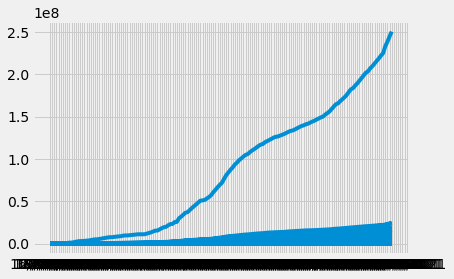

In [15]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.plot(vacc['Updated On'],vacc['Total Individuals Vaccinated'])
plt.show()

In [25]:
import numpy as np
india_vacc = vacc[vacc['State']=='India']
new_vacc = india_vacc.copy()
for i in range(new_vacc.shape[0]):
    if i == 0:
        continue
    else:
        new_vacc.iloc[i,2:] = np.abs(india_vacc.iloc[i, 2:] - india_vacc.iloc[i-1, 2:])

new_vacc

Updated On  State  Total Doses Administered  Sessions   Sites   \
0    16/01/2021  India                   48276.0    3455.0   2957.0   
1    17/01/2021  India                   10328.0    5077.0   1997.0   
2    18/01/2021  India                   40845.0    5079.0   1629.0   
3    19/01/2021  India                   96076.0    4244.0   1368.0   
4    20/01/2021  India                   55755.0    7617.0   2553.0   
..          ...    ...                       ...       ...      ...   
207  11/08/2021  India                       NaN       NaN      NaN   
208  12/08/2021  India                       NaN       NaN      NaN   
209  13/08/2021  India                       NaN       NaN      NaN   
210  14/08/2021  India                       NaN       NaN      NaN   
211  15/08/2021  India                       NaN       NaN      NaN   

     First Dose Administered  Second Dose Administered  \
0                    48276.0                       0.0   
1                    10328.0                       0.0   
2                    40845.0                       0.0   
3                    96076.0                       0.0   
4                    55755.0                       0.0   
..                       ...                       ...   
207                      NaN                       NaN   
208                      NaN                       NaN   
209                      NaN                       NaN   
210                      NaN                       NaN   
211                      NaN                       NaN   

     Male (Doses Administered)  Female (Doses Administered)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   
..                         ...                          ...   
207                        NaN                          NaN   
208                        NaN                          NaN   
209                        NaN                          NaN   
210                        NaN                          NaN   
211                        NaN                          NaN   

     Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                                 NaN  ...                               NaN   
1                                 NaN  ...                               NaN   
2                                 NaN  ...                               NaN   
3                                 NaN  ...                               NaN   
4                                 NaN  ...                               NaN   
..                                ...  ...                               ...   
207                               NaN  ...                               NaN   
208                               NaN  ...                               NaN   
209                               NaN  ...                               NaN   
210                               NaN  ...                               NaN   
211                               NaN  ...                               NaN   

     45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                                 NaN                             NaN   
1                                 NaN                             NaN   
2                                 NaN                             NaN   
3                                 NaN                             NaN   
4                                 NaN                             NaN   
..                                ...                             ...   
207                               NaN                             NaN   
208                               NaN                             NaN   
209                               NaN                             NaN   
210    

In [17]:
new_vacc.to_csv('india_vacc.csv')

In [27]:
new_vacc.columns

Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [9]:
1 & 3

1

In [30]:
new_vacc[new_vacc[' Sites '] > 1000 and new_vacc['Sessions'] > 5000]

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [137]:
new_vacc2 = new_vacc.loc[(new_vacc[' Sites '] > 1000) & (new_vacc['Sessions'] > 5000)]
new_vacc2.reset_index(drop=True)
new_vacc2['new state'] = np.where(new_vacc2[' Sites '] > 5000,'high','low')
new_vacc2

/home/ibab/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/ibab/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Updated On  State  Total Doses Administered    Sessions   Sites   \
1    17/01/2021  India                   10328.0      5077.0   1997.0   
2    18/01/2021  India                   40845.0      5079.0   1629.0   
4    20/01/2021  India                   55755.0      7617.0   2553.0   
5    21/01/2021  India                  114685.0      6754.0   2096.0   
7    23/01/2021  India                  209627.0      6088.0   1490.0   
..          ...    ...                       ...         ...      ...   
201  05/08/2021  India                 5849665.0   5219696.0  13189.0   
202  06/08/2021  India                 9326132.0   2420052.0   6830.0   
203  07/08/2021  India                 5699968.0   2659699.0   4263.0   
204  08/08/2021  India                 1940865.0  12322063.0  27118.0   
205  09/08/2021  India                 5500497.0  11625056.0  27192.0   

     First Dose Administered  Second Dose Administered  \
1                    10328.0                       0.0   
2                    40845.0                       0.0   
4                    55755.0                       0.0   
5                   114685.0                       0.0   
7                   209627.0                       0.0   
..                       ...                       ...   
201                4388874.0                 1460791.0   
202                7686096.0                 1640036.0   
203                4254379.0                 1445589.0   
204                1362209.0                  578656.0   
205                4188936.0                 1311561.0   

     Male (Doses Administered)  Female (Doses Administered)  \
1                          NaN                          NaN   
2                          NaN                          NaN   
4                          NaN                          NaN   
5                          NaN                          NaN   
7                          NaN                          NaN   
..                         ...                          ...   
201                  2973058.0                    2875049.0   
202                  2893661.0                    2833237.0   
203                  2924898.0                    2773560.0   
204                  1001430.0                     939002.0   
205                  2927242.0                    2721661.0   

     Transgender (Doses Administered)  ...  45-60 Years (Doses Administered)  \
1                                 NaN  ...                               NaN   
2                                 NaN  ...                               NaN   
4                                 NaN  ...                               NaN   
5                                 NaN  ...                               NaN   
7                                 NaN  ...                               NaN   
..                                ...  ...                               ...   
201                            1558.0  ...                         1365399.0   
202                            1280.0  ...                         1432493.0   
203                            1510.0  ...                         1281462.0   
204                             433.0  ...                          483630.0   
205                            1654.0  ...                         1336938.0   

     60+ Years (Doses Administered)  18-44 Years(Individuals Vaccinated)  \
1                               NaN                                  NaN   
2                               NaN                                  NaN   
4                               NaN                                  NaN   
5                               NaN                                  NaN   
7                               NaN                                  NaN   
..                              ...                                  ...   
201                        665181.0                                  NaN   
202                        696030.0                                  NaN   
203                        60

In [74]:
np.random.randn(6, 4)
a=pd.date_range(start='20210101',end='20210104')
a
b = pd.DataFrame(np.random.randn(4,4),index=a,columns=list('ABCD'))

In [94]:
pd.Timestamp('20210101')
pd.Timestamp(year=2021,month=1,day=1,hour=0,minute=1,second=0)
a=pd.date_range(start='20210101',end='20210104',freq='.5H')
a

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:30:00',
               '2021-01-01 01:00:00', '2021-01-01 01:30:00',
               '2021-01-01 02:00:00', '2021-01-01 02:30:00',
               '2021-01-01 03:00:00', '2021-01-01 03:30:00',
               '2021-01-01 04:00:00', '2021-01-01 04:30:00',
               ...
               '2021-01-03 19:30:00', '2021-01-03 20:00:00',
               '2021-01-03 20:30:00', '2021-01-03 21:00:00',
               '2021-01-03 21:30:00', '2021-01-03 22:00:00',
               '2021-01-03 22:30:00', '2021-01-03 23:00:00',
               '2021-01-03 23:30:00', '2021-01-04 00:00:00'],
              dtype='datetime64[ns]', length=145, freq='30T')

In [81]:

print(b)
b.sort_index(ascending=False)

                   A         B         C         D
2021-01-01 -1.002571 -0.429540 -0.756294 -0.645759
2021-01-02  1.058523 -2.148108  0.114869  0.246681
2021-01-03  1.119989 -0.940320 -0.688060 -0.397425
2021-01-04  1.255737 -0.324772  0.510424  0.249962


A         B         C         D
2021-01-04  1.255737 -0.324772  0.510424  0.249962
2021-01-03  1.119989 -0.940320 -0.688060 -0.397425
2021-01-02  1.058523 -2.148108  0.114869  0.246681
2021-01-01 -1.002571 -0.429540 -0.756294 -0.645759

In [88]:
b.iloc[[3]]
b.iloc[1:3,:]


A         B         C         D
2021-01-02  1.058523 -2.148108  0.114869  0.246681
2021-01-03  1.119989 -0.940320 -0.688060 -0.397425

In [92]:
b['new_c'] = ['one','two','three','two']
b[b['new_c'].isin(['two','one'])]

A         B         C         D new_c
2021-01-01 -1.002571 -0.429540 -0.756294 -0.645759   one
2021-01-02  1.058523 -2.148108  0.114869  0.246681   two
2021-01-04  1.255737 -0.324772  0.510424  0.249962   two

In [105]:
b['5'] = 5
print(b[['A','B']])
b[['A','B']]+1
b['B'] = b['B'] - 1
print(b[['A','B']])

                   A         B
2021-01-01 -1.002571 -0.429540
2021-01-02  1.058523 -2.148108
2021-01-03  1.119989 -0.940320
2021-01-04  1.255737 -0.324772
                   A         B
2021-01-01 -1.002571 -1.429540
2021-01-02  1.058523 -3.148108
2021-01-03  1.119989 -1.940320
2021-01-04  1.255737 -1.324772


In [110]:
c = b[['A','B']]
print(c)
c.apply(np.cumsum)

                   A         B
2021-01-01 -1.002571 -1.429540
2021-01-02  1.058523 -3.148108
2021-01-03  1.119989 -1.940320
2021-01-04  1.255737 -1.324772


A         B
2021-01-01 -1.002571 -1.429540
2021-01-02  0.055952 -4.577648
2021-01-03  1.175941 -6.517967
2021-01-04  2.431678 -7.842739

In [121]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)),rng)
ts

2012-03-06   -1.646530
2012-03-07    0.509046
2012-03-08   -0.664040
2012-03-09    1.576980
2012-03-10   -1.785318
Freq: D, dtype: float64